In [61]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Computational_Statistics/blob/main/10/W10b.ipynb)

## Bootstrap estimation of standard error
## Bootstrap Example (LSAT vs GPA)


In [62]:
LSAT = np.array([576, 635, 558, 578, 666, 580, 555, 661, 651, 605, 653, 575, 545, 572, 594])
GPA = np.array([339, 330, 281, 303, 344, 307, 300, 343, 336, 313, 312, 274, 276, 288, 296])
# 1) Find correlation
# 2) Do bootstrap replicated and find standard error
# 3) plot histogram of bootstrap correlations

In [68]:
np.corrcoef(LSAT, GPA)[0,1]


0.7763744912894072

In [70]:
def bootstrap(x = LSAT, y = GPA, n_replicate = 1000):
  assert len(x) == len(y)
  N = len(x)
  coeff_array = n_replicate*[0]
  for i in range(n_replicate):
    indexes = np.random.choice(range(N), size = N, replace = True)
    coeff_array[i] = np.corrcoef(x[indexes],y[indexes])[0, 1]
  return np.array(coeff_array)

# What is the boostrap estimation of standard error?

In [75]:
bootstrap(n_replicate = 1000).std(ddof = 1)

0.1382507017582825

# Sketch histogram of distribution of bootstrap replicates


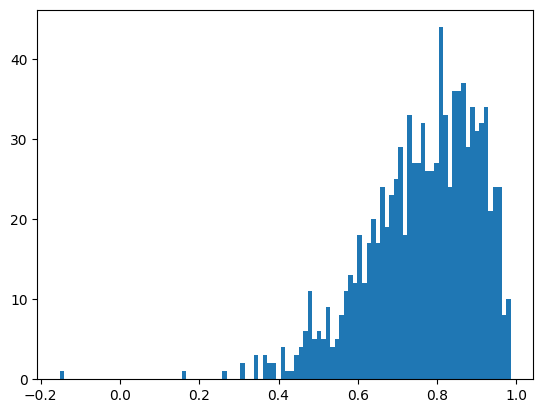

In [77]:
plt.hist(bootstrap(), bins = 100);

## Bootstrap estimation of bias


In [88]:
Q = [(bootstrap(n_replicate = 200)-np.corrcoef(LSAT, GPA)[0,1]).mean() for _ in range(1000)]

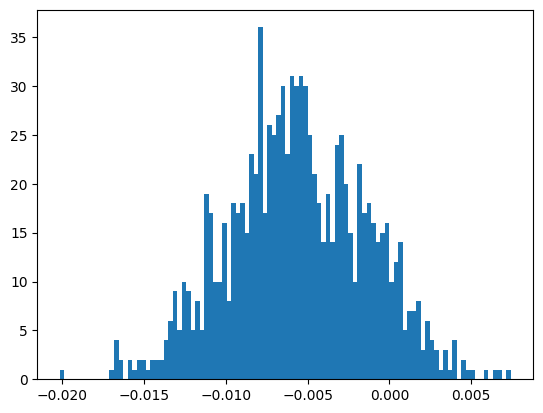

In [89]:
plt.hist(Q, bins = 100);

In [94]:
(bootstrap(n_replicate = 200)-np.corrcoef(LSAT, GPA)[0,1]).mean()

-0.0025213755252852703

In [97]:
[j for j in range(10) if j != 5]

[0, 1, 2, 3, 4, 6, 7, 8, 9]

## How to create Jackknife Blocks?


In [98]:
def jackknife(x = LSAT, y = GPA):
  assert len(x) == len(y)
  N = len(x)
  corr_array = []
  for i in range(N):
    blocks = [j for j in range(N) if j != i]
    corr_array.append(np.corrcoef(x[blocks], y[blocks])[0,1])
  return np.array(corr_array)

In [100]:
jackknife().std()

0.03808970300328646

## Let's compute Jackknife bias in the above example

*   List item
*   List item



In [103]:
N = len(LSAT)
(N-1)*(jackknife()-np.corrcoef(LSAT, GPA)[0,1]).mean()

-0.00647362304592464

## Let's compute Jackknife standard error


In [101]:
((N-1)**0.5)*jackknife().std(ddof = 0)

0.14251861860227236